## Modelos de predicción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Cargamos el dataset procesado

In [2]:
df_models = pd.read_csv('../data/processed/data_processed.csv')

In [3]:
df_models.head()

,Mes,Año,Estancia Media,Alojamientos Ocupados,Noches Ocupadas,Comunidades y Ciudades Autónomas_01 Andalucía,Comunidades y Ciudades Autónomas_02 Aragón,"Comunidades y Ciudades Autónomas_03 Asturias, Principado de","Comunidades y Ciudades Autónomas_04 Balears, Illes",Comunidades y Ciudades Autónomas_05 Canarias,...,Comunidades y Ciudades Autónomas_12 Galicia,"Comunidades y Ciudades Autónomas_13 Madrid, Comunidad de","Comunidades y Ciudades Autónomas_14 Murcia, Región de","Comunidades y Ciudades Autónomas_15 Navarra, Comunidad Foral de",Comunidades y Ciudades Autónomas_16 País Vasco,"Comunidades y Ciudades Autónomas_17 Rioja, La",Comunidades y Ciudades Autónomas_Total Nacional,Residencia del viajero_Residentes en España,Residencia del viajero_Residentes en el Extranjero,Residencia del viajero_Total
0,1,2018,-0.952277,-0.112008,-0.249081,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,2019,-0.891982,-0.058029,-0.214746,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,2020,-0.891982,0.058926,-0.144170,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,2021,-0.771391,-0.228963,-0.294861,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,2022,-0.590505,0.049929,-0.106020,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Separación de los datos para entrenamiento y prueba de los modelos

In [4]:
target_columns = ['Estancia Media', 'Alojamientos Ocupados', 'Noches Ocupadas']
X = df_models.drop(target_columns, axis=1)
X.head()

,Mes,Año,Comunidades y Ciudades Autónomas_01 Andalucía,Comunidades y Ciudades Autónomas_02 Aragón,"Comunidades y Ciudades Autónomas_03 Asturias, Principado de","Comunidades y Ciudades Autónomas_04 Balears, Illes",Comunidades y Ciudades Autónomas_05 Canarias,Comunidades y Ciudades Autónomas_06 Cantabria,Comunidades y Ciudades Autónomas_07 Castilla y León,Comunidades y Ciudades Autónomas_08 Castilla - La Mancha,...,Comunidades y Ciudades Autónomas_12 Galicia,"Comunidades y Ciudades Autónomas_13 Madrid, Comunidad de","Comunidades y Ciudades Autónomas_14 Murcia, Región de","Comunidades y Ciudades Autónomas_15 Navarra, Comunidad Foral de",Comunidades y Ciudades Autónomas_16 País Vasco,"Comunidades y Ciudades Autónomas_17 Rioja, La",Comunidades y Ciudades Autónomas_Total Nacional,Residencia del viajero_Residentes en España,Residencia del viajero_Residentes en el Extranjero,Residencia del viajero_Total
0,1,2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,2019,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,2021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,2022,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
y = df_models[target_columns]
y.head()

,Estancia Media,Alojamientos Ocupados,Noches Ocupadas
0,-0.952277,-0.112008,-0.249081
1,-0.891982,-0.058029,-0.214746
2,-0.891982,0.058926,-0.144170
3,-0.771391,-0.228963,-0.294861
4,-0.590505,0.049929,-0.106020


In [6]:
# Separando los datos en train y test
train, test = train_test_split(df_models, test_size=0.25)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((2511, 23), (628, 23))

Guardamos los datasets de train y set

In [7]:
datasets = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test
}

for name, data in datasets.items():
    data.to_csv(f'../data/processed/{name}.csv', index=False)


### Regresión Lineal Múltiple

In [8]:
mlr_model = LinearRegression()

mlr_model.fit(X_train, y_train)

predictions_mlr_model = mlr_model.predict(X_test)

##### Raíz del error cuadrático medio del modelo de regresión lineal

In [9]:
rmse_mlr = np.sqrt(mean_squared_error(y_test, predictions_mlr_model))

print("RMSE:", rmse_mlr)

RMSE: 0.5455297443761002


##### Coeficiente de determinación del modelo de regresión lineal

In [10]:
r2_mlr = r2_score(y_test, predictions_mlr_model)

print("R2 Score:", r2_mlr)

R2 Score: 0.6388974376538233


Creamos gráficos de regresión lineal para cada variable de respuesta

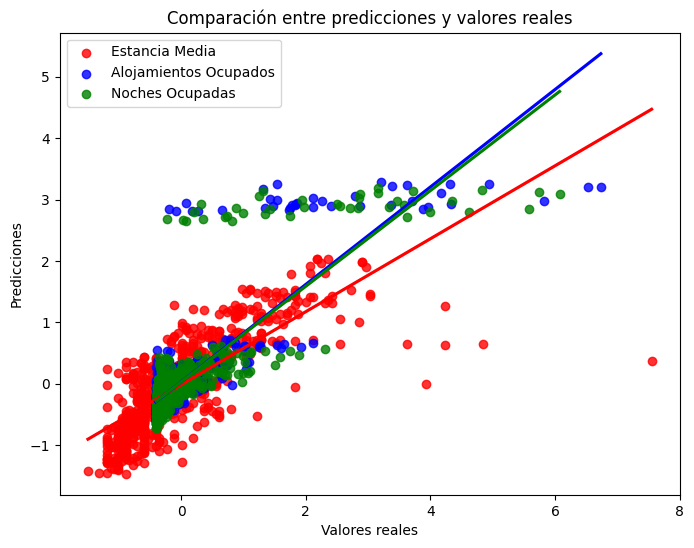

In [11]:
plt.figure(figsize=(8, 6))

sns.regplot(x=y_test['Estancia Media'], y=predictions_mlr_model[:,0], ci=None, color='red', label='Estancia Media')
sns.regplot(x=y_test['Alojamientos Ocupados'], y=predictions_mlr_model[:,1], ci=None, color='blue', label='Alojamientos Ocupados')
sns.regplot(x=y_test['Noches Ocupadas'], y=predictions_mlr_model[:,2], ci=None, color='green', label='Noches Ocupadas')

plt.title('Comparación entre predicciones y valores reales')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.legend()

plt.show()


### Random Forest

In [12]:
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)

rfr_model.fit(X_train, y_train)

predictions_rfr_model = rfr_model.predict(X_test)

##### RMSE y R2 score del modelo Random Forest

In [13]:
rmse_rfr = np.sqrt(mean_squared_error(y_test, predictions_rfr_model))
r2_rfr = r2_score(y_test, predictions_rfr_model)

print("RMSE:", rmse_rfr)
print("R2:", r2_rfr)

RMSE: 0.3168377336270024
R2: 0.8923571179980216


Graficamos las predicciones vs los valores reales para cada variable de respuesta

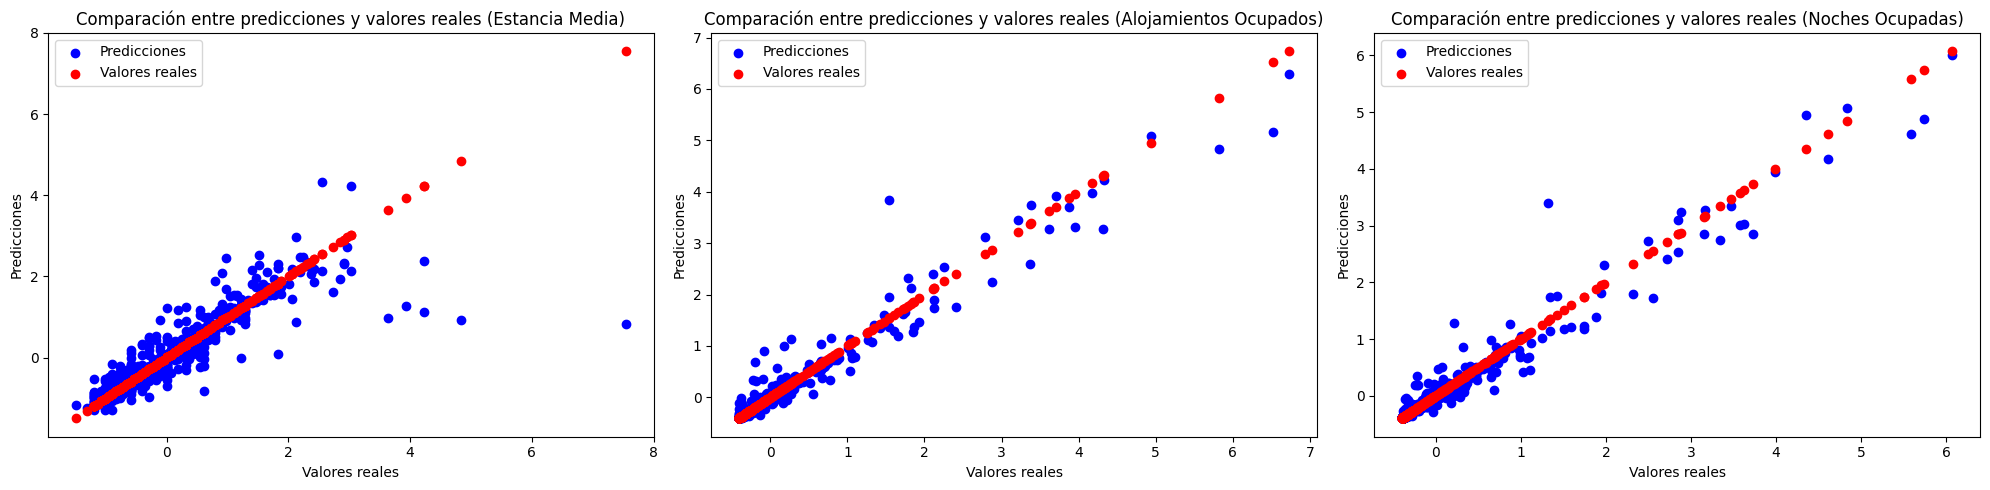

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for i, variable in enumerate(['Estancia Media', 'Alojamientos Ocupados', 'Noches Ocupadas']):
    axs[i].scatter(y_test[variable], predictions_rfr_model[:, i], color='blue', label='Predicciones')
    axs[i].scatter(y_test[variable], y_test[variable], color='red', label='Valores reales')
    axs[i].set_xlabel('Valores reales')
    axs[i].set_ylabel('Predicciones')
    axs[i].set_title(f'Comparación entre predicciones y valores reales ({variable})')
    axs[i].legend()

plt.tight_layout()
plt.show()


Los resultados nos permiten concluir que el modelo de Random Forest es más preciso.